In [1]:
### Introduction to Matminer & Materials Project

In [2]:
!pip install matminer pymatgen mp-api pandas matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.4/301.4 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mp_api.client import MPRester
from matminer.data_retrieval.retrieve_MP import MPDataRetrieval


In [8]:
API_KEY = "bwIBVyml1bGmgbmvvHcYGUlJBkRWTjL9"  # Replace with your Materials Project API key

from mp_api.client import MPRester
mpr = MPRester(API_KEY)
# mpdr = MPDataRetrieval(API_KEY) # This is not needed when using the new MPRester

In [10]:
criteria = {"band_gap": {"$gt": 1, "$lt": 4}}
properties = ["material_id", "formula_pretty", "band_gap", "formation_energy_per_atom"]

# Use the new MPRester object to query the data
# The query method is now available directly on the MPRester object
# df = mpr.query(criteria=criteria, properties=properties, df_proj=True)

# Updated code using the new summary.search method
# Note: The new method no longer supports direct MongoDB-type queries for criteria
# You might need to adjust the criteria based on the available parameters in summary.search
docs = mpr.summary.search(band_gap=(1, 4), fields=properties)

# Convert the list of SummaryDoc objects to a pandas DataFrame
df = pd.DataFrame([doc.dict() for doc in docs])

print(f"Fetched {len(df)} materials from Materials Project.")
display(df.head())

/tmp/ipython-input-3474491649.py:11: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  docs = mpr.summary.search(band_gap=(1, 4), fields=properties)


Retrieving SummaryDoc documents:   0%|          | 0/45348 [00:00<?, ?it/s]

Fetched 45348 materials from Materials Project.


,formula_pretty,material_id,formation_energy_per_atom,band_gap,fields_not_requested
0,Ac2O3,mp-qlf,-3.737668,3.5226,"[builder_meta, nsites, elements, nelements, co..."
1,Ac2S3,mp-bwno,-2.493064,2.2962,"[builder_meta, nsites, elements, nelements, co..."
2,Ac2S3,mp-cdpul,-2.440364,3.0275,"[builder_meta, nsites, elements, nelements, co..."
3,AcCrO3,mp-bxhfp,-3.138972,2.0031,"[builder_meta, nsites, elements, nelements, co..."
4,AcGaO3,mp-cpicb,-3.063253,2.8959,"[builder_meta, nsites, elements, nelements, co..."


In [11]:
df.describe()

,formation_energy_per_atom,band_gap
count,45348.000000,45348.000000
mean,-2.087905,2.311417
std,0.873959,0.829415
min,-4.321499,1.000000
25%,-2.702862,1.597675
50%,-2.278518,2.233900
75%,-1.542841,2.983600
max,4.688205,4.000000


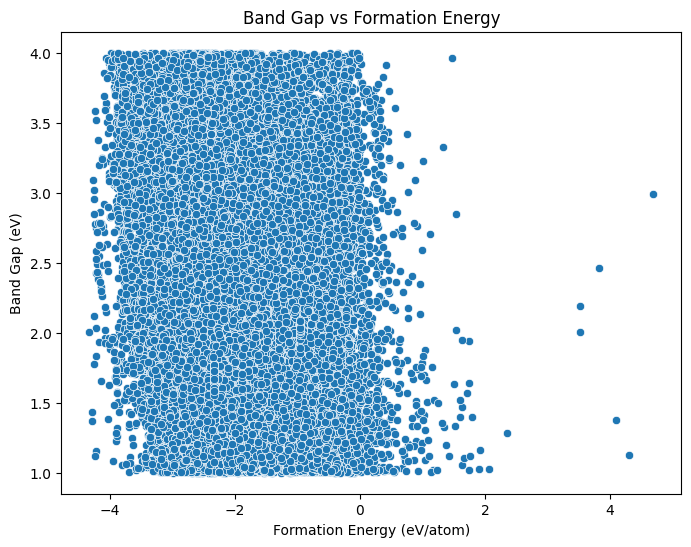

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="formation_energy_per_atom", y="band_gap")
plt.title("Band Gap vs Formation Energy")
plt.xlabel("Formation Energy (eV/atom)")
plt.ylabel("Band Gap (eV)")
plt.show()


In [13]:
df.to_csv("materials_bandgap_data.csv", index=False)
